<hr style="border: 2px solid green;" />

Hello, Daniel!🤚 

My name is Kseniya Vishnevskaya. I'm going to review your project 😊 

✏️You can find my comments in <font color='green'>green</font>, <font color='orange'>yellow</font> or <font color='red'>red</font> boxes like this:

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
    I'm using green color if everything is done perfectly.</div>       
<br>
<div style="border:solid orange 2px; padding: 20px"> <b>Remarks:</b><br>
    if I can give some recommendations</div>   
<br>
<div style="border:solid red 2px; padding: 20px"> <b>Needs fixing:</b><br>
    if the block requires some corrections. Work can't be accepted with the red comments</div>

 
Further in the file you can see my comments, try to take them into account when performing the next tasks. **Please, don't delete them.** :)

Let's work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track the changes if you highlight your comments:

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Student comment:</b> In the blue boxes you can leave comments and ask questions.</div>


<hr style="border: 2px solid green;" />

### <font color='orange'>General feedback</font>

<s><div style="border:solid red 2px; padding: 20px"> <b>Needs fixing:</b><br>
  Thank you for sending your project🙂. You've done a really good job on it! 
    I especially  liked the style, code formatting and the visualization you've made. 
However, you have some things to correct. But don't worry, you've got this :)</div>

<div style="border:solid orange 2px; padding: 20px"> <b>Remarks:</b><br>
    There are some comments for further improvement. They don't mean that you did anything wrong, but they're things we wanted to point out that can help you further develop your skills. 

And also I leave several links that can help you to make your further projects even better:

 * A/B test
        
 https://hbr.org/2017/06/a-refresher-on-ab-testing
    
 https://towardsdatascience.com/the-math-behind-a-b-testing-with-example-code-part-1-of-2-7be752e1d06f


 * Interesting charts in matplotlib library:

    <a>https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/</a>

          
* Statistical Tests:
   
     <a>https://towardsdatascience.com/what-are-the-commonly-used-statistical-tests-in-data-science-a95cfc2e6b5e</a>
  
 https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
          

* Some information about pandas:
    
     <a> https://towardsdatascience.com/style-pandas-dataframe-like-a-master-6b02bf6468b0</a>          
 

</div>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Student comment v.1:</b> <br />
    Thank you Kseniya for your kind words. <br />
    I very much appreciate and value your detailed comments. <br />
    For this submission I have tried to apply all of the needed corrections where applicable.
</div>

<font color='orange'>Daniel, thank you a lot, I'm glad to be helpful :)</font>

<div style="border:solid green 2px; padding: 20px"> <b>Success V2:</b><br>
     I really appreciate the corrections you sent in! 😊  Thanks for taking the time to do so. All your hard work has paid off, and now your project is perfect! I really like that you worked even on "improve comments".   Your project has been accepted and you can go to the next sprint! Congratulations! 🥳 </div> 

-----

In [77]:
!pip install -q --user --upgrade pandas
!pip install -q --user --upgrade matplotlib
!pip install -q --user --upgrade seaborn

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from IPython.display import display, Markdown

In [3]:
# pandas styling
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)

# matplotlib styling
plt.rcParams["figure.figsize"] = (13, 7)

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
    Very well that you keep all libraries in a separate cell and use -q key to hide insalling outputs 👍  </div> 

# A/B Testing analysis
As an analyst of a big online store, I've compiled a list of hypotheses together with the marketing department.  
We will prioritize those hypotheses, and conduct the top prioritized A/B test.

## Table of Contents
- [Prioritizing Hypotheses](#Prioritizing-Hypotheses)
    - [Preprocess](#Hypothesis_preprocess)
    - [Priority](#Priority---ICE,-RICE)
- [A/B Test Analysis](#A/B-Test-Analysis)
    - [Preprocess](#AB_test_preprocess)
        - [Orders](#Orders)
        - [Visits](#Visits)
        - [Compare](#Compare)
    - [Analysis](#Analysis)
        - [Aggregate data](#Aggregate-data)
        - [Group cumulative revenue](#Group-cumulative-revenue)
        - [Group cumulative avg. order size](#Group-cumulative-avg.-order-size)
        - [Group cumulative avg. order size - relative difference](#Group-cumulative-avg.-order-size---relative-difference)
        - [Group cumulative conversion ratio](#Group-cumulative-conversion-ratio)
        - [Orders per user](#Orders-per-user)
        - [Orders per user - percentiles](#Orders-per-user---percentiles)
        - [Orders prices](#Orders-prices)
        - [Orders prices - percentiles](#Orders-prices---percentiles)
        - [Group conversion - raw data statistical significance](#Group-conversion---raw-data-statistical-significance)
        - [Group avg. order size - raw data statistical significance](#Group-avg.-order-size---raw-data-statistical-significance)
        - [Group conversion - filtered data statistical significance](#Group-conversion---filtered-data-statistical-significance)
        - [Group avg. order size - filtered data statistical significance](#Group-avg.-order-size---filtered-data-statistical-significance)
        - [Test continuation](#Test-continuation)

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
    Excellent work! Thank you for writing a description of the project, what tasks you are going to accomplish in the process and making the table of contents interactive  👍 </div> 

In [4]:
def find_file(filename):
    """Returns file path under /datasets directory, if exists, otherwise uses local dir"""
    
    filepath = f'/datasets/{filename}'
    if not os.path.isfile(filepath):
        filepath = filename
        
    return filepath

# find_file('hypotheses_us.csv')

In [5]:
def file_info(filename):
    """Previews a file using unix commands"""
    
    path = find_file(filename)
    
    try:
        !wc -lm "$path"
        !cat "$path" | head -n2
    except:
        pass
    
# file_info('hypotheses_us.csv')

In [6]:
def parse_csv(filename, **kwargs):
    """Returns a pandas DataFrame"""
    
    path = find_file(filename)
    print(f'parsing {path}..')
    return pd.read_csv(path, **kwargs)

# parse_csv('hypotheses_us.csv', delimiter=';')

In [7]:
def parse_preview_frame(filename, nrows=10, preview=False, **kwargs):
    """
    Parses a preview (n rows) from the file.
    
    Returns a pandas DataFrame.
    """
    
    path = find_file(filename)
    df = parse_csv(path, nrows=nrows, **kwargs)
    
    if preview:
        lines = 5
        if isinstance(preview, int) and not isinstance(preview, bool):
            lines = preview
            
        display(df.head(lines))
        
    return df

# parse_preview_frame('hypotheses_us.csv', nrows=3, delimiter=';')

In [8]:
def report(df):
    """Builds a report of a dataframe, detailing:
    
    - missing values
    - duplicated values
    """
    
    name = f'"{df}"' if isinstance(df, str) else f'"{df.name}"' if hasattr(df, 'name') else ''
    df = df if isinstance(df, pd.DataFrame) else globals()[df]
    na = df.isna()
    dp = df.duplicated()
    
    na_count = na.sum().sum()
    dp_count = dp.sum()
    
    if na_count == 0 and dp_count == 0:
        print(f'{name} dataframe has no missing values or duplicates.')
    else:
        report = f'#### {name} dataframe issues:\n'
        if na_count != 0:
            report += f'- missing values: {na_count}\n'
            display(df[na.any(axis=1)].rename_axis('Missing values', axis='columns').head(3))
        if dp_count != 0:
            report += f'- duplicated values: {dp_count}'
            display(df[dp].rename_axis('Duplicated values', axis='columns').head(3))
            
        display(Markdown(report))

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
   Wow, well done for creating all functions at the beginning of the project and using docstring to annotate them! 😊 </div>       

## Prioritizing Hypotheses
***
[back](#Table-of-Contents)

- [Preprocess](#Hypothesis_preprocess)
- [Priority](#Priority---ICE,-RICE)

<a id="Hypothesis_preprocess"></a>
## Preprocess
***
[up](#Prioritizing-Hypotheses)

Features:
- Hypotheses — brief descriptions of the hypotheses
- Reach — user reach, on a scale of one to ten
- Impact — impact on users, on a scale of one to ten
- Confidence — confidence in the hypothesis, on a scale of one to ten
- Effort — the resources required to test a hypothesis, on a scale of one to ten.  
The higher the Effort value, the more resource-intensive the test.

In [9]:
filename = 'hypotheses_us.csv'
file_info(filename)

  9 888 /datasets/hypotheses_us.csv
Hypothesis;Reach;Impact;Confidence;Effort
Add two new channels for attracting traffic. This will bring 30% more users;3;10;8;6


In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)

In [11]:
hypotheses_df = parse_csv(filename, delimiter=';')
hypotheses_df.head()

parsing /datasets/hypotheses_us.csv..


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1


<s><div style="border:solid orange 2px; padding: 20px"> <b>Remarks:</b><br>
    
To show all the information in tables you can  extend the fields of the tables using: 
        
`pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)`  

in the cell with all library imports. </div>   

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Student comment v.1:</b> <br />
    That is much better, thanks 🙂
</div>

<div style="border:solid green 2px; padding: 20px"> <b>Success V2:</b><br>
    Very well!</div> 

In [12]:
hypotheses_df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [13]:
hypotheses_df.describe()

,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [14]:
report(hypotheses_df)

 dataframe has no missing values or duplicates.


<s><div style="border:solid red 2px; padding: 20px"> <b>Needs fixing:</b><br>
    Please write the conclusions here.</div>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Student comment v.1:</b> <br />
    Update below.
</div>

Parsed data set has 9 different hypotheses in total, and each such hypothesis is a potential A/B test.  
The features are scores of a metric, and it will enable us to prioritize which hypotheses are to be tested first.  
Each of the metrics is on a scale of 1-10, with no noticeable exceptions or problems.  
There are no missing values, nor duplicates.

<div style="border:solid green 2px; padding: 20px"> <b>Success V2:</b><br>
   Thank you for the conclusions :)</div> 

## Priority - ICE, RICE
***
[up](#Prioritizing-Hypotheses)

In [15]:
def high_score_metric(df, metric, title):
    """Prints selection info, filtered by max metric value"""
    
    max_idx = df[metric].idxmax()
    max_row = df.iloc[max_idx]
    
    result = f"Highest scoring {metric}: {max_row[metric]} <br />" \
             f"{title.capitalize()} #{max_idx} - {max_row[title]}"
        
    display(Markdown(result))

In [16]:
hypotheses_df['ICE'] = hypotheses_df['Impact'] * hypotheses_df['Confidence'] / hypotheses_df['Effort']
hypotheses_df.sort_values('ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000


In [17]:
high_score_metric(hypotheses_df, metric='ICE', title='Hypothesis')

Highest scoring ICE: 16.2 <br />Hypothesis #8 - Launch a promotion that gives users discounts on their birthdays

In [18]:
hypotheses_df['RICE'] = (
    hypotheses_df['Reach'] 
    * hypotheses_df['Impact'] 
    * hypotheses_df['Confidence']
    / hypotheses_df['Effort'])
hypotheses_df.sort_values('RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


In [19]:
high_score_metric(hypotheses_df, metric='RICE', title='Hypothesis')

Highest scoring RICE: 112.0 <br />Hypothesis #7 - Add a subscription form to all the main pages. This will help you compile a mailing list

 <div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
    All the calculations are correct, well done. </div> 

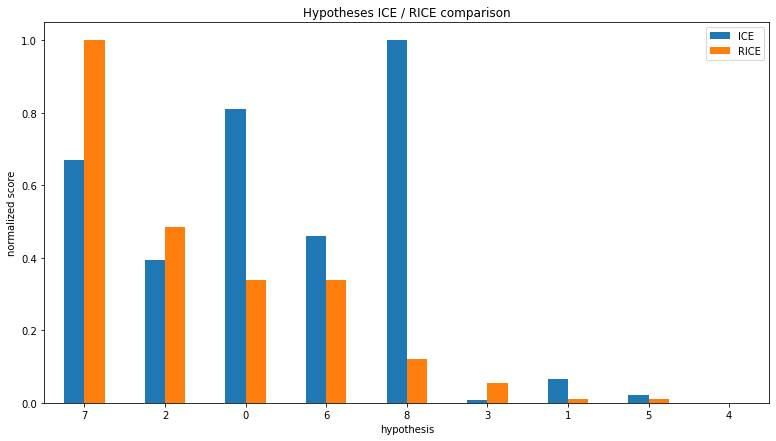

In [20]:
ice_norm = (
    (hypotheses_df['ICE'] - hypotheses_df['ICE'].min()) 
    / (hypotheses_df['ICE'].max() - hypotheses_df['ICE'].min()))
rice_norm = (
    (hypotheses_df['RICE'] - hypotheses_df['RICE'].min()) 
    / (hypotheses_df['RICE'].max() - hypotheses_df['RICE'].min()))

norm = pd.DataFrame({'ICE': ice_norm, 'RICE': rice_norm}).sort_values(['RICE', 'ICE'], ascending=False)
# print(norm)

norm.plot.bar(rot=0)
plt.title('Hypotheses ICE / RICE comparison')
plt.ylabel('normalized score')
plt.xlabel('hypothesis')
plt.show()

**ICE** is an acronym for **I**mpact * **C**onfidence * **E**ase (or 1/**E**ffort).  
**RICE** is the same, only multiplied by **R**each.  
Since the reach of hypothesis #7 is maximised (10/10), it's able to surpass the maximum ICE metric, which falls behind (due to small reach).

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
    Ok, agree with you. Very reasonable point.</div>  

<s><div style="border:solid orange 2px; padding: 20px"> <b>Remarks:</b><br>
    You can also build a scatterplot for a better visualization.  I'll leave a sample code below.</div>   

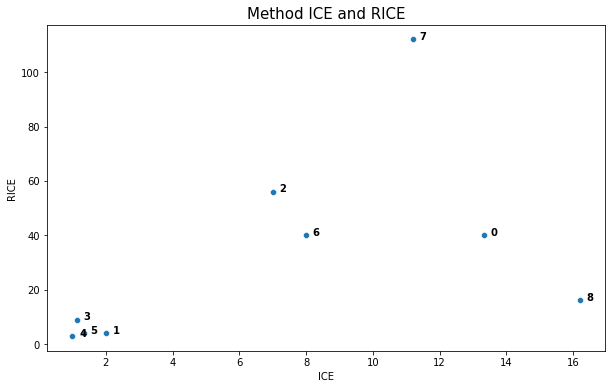

In [21]:
#Reviewer's code
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Method ICE and RICE', size=15)
sns.scatterplot(x=hypotheses_df['ICE'], y=hypotheses_df['RICE'])
for line in range(0,hypotheses_df.shape[0]):
     plt.text(hypotheses_df.ICE[line]+0.2, 
              hypotheses_df.RICE[line], 
              hypotheses_df.index[line], 
              horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()

<s><div style="border:solid red 2px; padding: 20px"> <b>Needs fixing:</b><br>
    Could you please write brief conclusions on this module ?</div>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Student comment v.1:</b> <br />
    Update below.
</div>

<div style="border:solid green 2px; padding: 20px"> <b>Success V2:</b><br>
    👍</div>       

We parsed the hypotheses dataset, calculated ICE and RICE metrics,  
and concluded that hypothesis #7 is worth testing first,  
based on its RICE score (112) relative to all other htypotheses' scores.  


**Chosen hypothesis:**  
_Hypothesis #7_: "Add a subscription form to all the main pages. This will help you compile a mailing list"  

It has maximum Reach, and will impact most users.

## A/B Test Analysis
***
[back](#Table-of-Contents)

- [Preprocess](#AB_test_preprocess)
    - [Orders](#Orders)
    - [Visits](#Visits)
    - [Compare](#Compare)
- [Analysis](#Analysis)
    - [Aggregate data](#Aggregate-data)
    - [Group cumulative revenue](#Group-cumulative-revenue)
    - [Group cumulative avg. order size](#Group-cumulative-avg.-order-size)
    - [Group cumulative avg. order size - relative difference](#Group-cumulative-avg.-order-size---relative-difference)
    - [Group cumulative conversion ratio](#Group-cumulative-conversion-ratio)
    - [Orders per user](#Orders-per-user)
    - [Orders per user - percentiles](#Orders-per-user---percentiles)
    - [Orders prices](#Orders-prices)
    - [Orders prices - percentiles](#Orders-prices---percentiles)
    - [Group conversion - raw data statistical significance](#Group-conversion---raw-data-statistical-significance)
    - [Group avg. order size - raw data statistical significance](#Group-avg.-order-size---raw-data-statistical-significance)
    - [Group conversion - filtered data statistical significance](#Group-conversion---filtered-data-statistical-significance)
    - [Group avg. order size - filtered data statistical significance](#Group-avg.-order-size---filtered-data-statistical-significance)
    - [Test continuation](#Test-continuation)

<a id="AB_test_preprocess"></a>
## Preprocess
***
[up](#A/B-Test-Analysis)

- [Orders](#Orders)
- [Visits](#Visits)
- [Compare](#Compare)

In [22]:
def check_group_uniqueness(df):
    """
    Searches for users which are in both Group A and Group B.
    
    Returns user ids.
    """
    
    user_ids = df.groupby('visitorId').agg({'group': 'nunique'}).query('group > 1').index
    display(Markdown(
        f'There are {len(user_ids)} users which are in both A and B groups.'))
    return user_ids

### Orders
***
[up](#AB_test_preprocess)

Features:
- transactionId — order identifier
- visitorId — identifier of the user who placed the order
- date — of the order
- revenue — from the order
- group — the A/B test group that the user belongs to

In [23]:
filename = 'orders_us.csv'
file_info(filename)

 1198 48854 /datasets/orders_us.csv
transactionId,visitorId,date,revenue,group
3667963787,3312258926,2019-08-15,30.4,B


In [24]:
parse_preview_frame(filename, preview=True).info()

parsing /datasets/orders_us.csv..


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  10 non-null     int64  
 1   visitorId      10 non-null     int64  
 2   date           10 non-null     object 
 3   revenue        10 non-null     float64
 4   group          10 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 528.0+ bytes


<div style="border:solid orange 2px; padding: 20px"> <b>Remarks:</b><br>
     Please note that 64 bits is an excessive amount of space for storing your features.  Here you can read more about data type optimization: <br><a>https://medium.com/@vincentteyssier/optimizing-the-size-of-a-pandas-dataframe-for-low-memory-environment-5f07db3d72e</a>
</div> 

In [25]:
display(
    parse_preview_frame('orders_us.csv').head(1),
    parse_preview_frame('orders_us.csv', dtype={'transactionId': 'int32', 'visitorId': 'int32'}).head(1))

parsing /datasets/orders_us.csv..
parsing /datasets/orders_us.csv..


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B


,transactionId,visitorId,date,revenue,group
0,-627003509,-982708370,2019-08-15,30.4,B


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Student comment v.1:</b> <br />
    Coming from a programming background, I always strive to efficiency and optimization of code, <br />
    but have also many times prematurely optimized code, which lead to considerable time loss and little value. <br />
    I try to strike a balance between optimized code and cost/value ratio, <br />
    and nowadays tend to optimize when there is a proven need (via profiling or otherwise) to do so. <br /><br />
    Specifically in this case, the total memory footprint is low (&lt; 1kb), and our systems aren't constrained by low memory. <br />
    Furthermore, choosing int32 will actually alter the value, since the values are out of range for this type (example above).<br />
    I believe that if I was to deal with a very large dataset, I would positively reconsider this.
</div>

<div style="border:solid green 2px; padding: 20px"> <b>Success V2:</b><br>
    Okay :) I give these recommendations in general for your future work and future projects, when the datasets will be larger and more complex.</div>       

In [26]:
# categorical dtype causes problems down the road (with aggregation). not using it.

orders_df = parse_csv(filename, parse_dates=['date'])#, dtype={'group': 'category'})
orders_df.head()

parsing /datasets/orders_us.csv..


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [27]:
orders_df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [28]:
report(orders_df)

 dataframe has no missing values or duplicates.


<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
  
   I like that you use a variety of methods, including `head()`, `info()`  and  others when studying general information in tables. Also well done for checking for duplicates in the data.</div>  

In [29]:
A_and_B_user_ids = check_group_uniqueness(orders_df)

There are 58 users which are in both A and B groups.

Removing all (entries of) users that are in both teams.

In [30]:
orders = orders_df[~orders_df['visitorId'].isin(A_and_B_user_ids)]
display(Markdown(
    f'Original "orders" dataframe size: {orders_df.shape[0]}  \n' \
    f'Size after filter: {orders.shape[0]}'))
check_group_uniqueness(orders);

Original "orders" dataframe size: 1197  
Size after filter: 1016

There are 0 users which are in both A and B groups.

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
Great job, you found a significant bug that occurred when splitting into groups. I agree with your decision to exclude compromised users.</div>      

<s><div style="border:solid red 2px; padding: 20px"> <b>Needs fixing:</b><br>
   Please, write the conclusions here.</div>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Student comment v.1:</b> <br />
    Update below.
</div>

We have parsed the dataset containing user orders,  
specifying the transaction id, user id, date of transaction, the sum of it and the group the user belonged to during testing (A / B).  

There were no missing nor duplicated values,  
but some of the users were found in both groups' records.  
This will influence results and will affect the outcome, therefore said users' entries were removed from the table.

This also in turn potentially affects the visits' data,  
but there we don't have user identifiers which we can act upon.  

<div style="border:solid green 2px; padding: 20px"> <b>Success V2:</b><br>
    Perfect!</div> 

### Visits
***
[up](#AB_test_preprocess)

In [31]:
filename = 'visits_us.csv'
file_info(filename)

  62 1133 /datasets/visits_us.csv
date,group,visits
2019-08-01,A,719


In [32]:
parse_preview_frame(filename, preview=True).info()

parsing /datasets/visits_us.csv..


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    10 non-null     object
 1   group   10 non-null     object
 2   visits  10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [33]:
visits_df = parse_csv(filename, parse_dates=['date'])#, dtype={'group': 'category'})
visits_df.head()

parsing /datasets/visits_us.csv..


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [34]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [35]:
visits_df.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [36]:
visits_df.describe(include='datetime', datetime_is_numeric=True)

,date
count,62
mean,2019-08-16 00:00:00
min,2019-08-01 00:00:00
25%,2019-08-08 06:00:00
50%,2019-08-16 00:00:00
75%,2019-08-23 18:00:00
max,2019-08-31 00:00:00


In [37]:
report(visits_df)

 dataframe has no missing values or duplicates.


Looking for duplicated values, without the 'visits' property:

In [38]:
visits_df[['date', 'group']].duplicated().sum()

0

Checking for entries' count of each group:

In [39]:
visits_df.groupby('group').agg({'date': 'count'})

,date
group,
A,31
B,31


In [40]:
visits = visits_df
del visits_df

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
Great, we've looked at the general information about our data. Let's move on.</div>      

<s><div style="border:solid red 2px; padding: 20px"> <b>Needs fixing:</b><br>
   Please leave more comments on your code and don't forget to write your conclusions.This is important because the conclusion is often the basis for judging the quality of the work as a whole.</div>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Student comment v.1:</b> <br />
    Update below.
</div>

Visits dataset was imported successfully.  
It contains a count of sum of daily visits, split by groups (A / B), spread over a single month (August 2019).  
Both groups have 31 entries, 1 for each day of the month.  
There are no missing values, nor duplicates.

<div style="border:solid green 2px; padding: 20px"> <b>Success V2:</b><br>
    Thanks :)</div>    

### Compare
***
[up](#AB_test_preprocess)

In [41]:
orders_min_max = orders.describe(include='datetime', datetime_is_numeric=True)
visits_min_max = visits.describe(include='datetime', datetime_is_numeric=True)
are_dates_matching = (
    orders_min_max.loc['min'][0] == visits_min_max.loc['min'][0] 
        and orders_min_max.loc['max'][0] == visits_min_max.loc['max'][0])
display(
    pd.concat([orders_min_max, visits_min_max], axis=1),
    Markdown(f'Do the dates coincide? {are_dates_matching}'))

,date,date
count,1016,62
mean,2019-08-15 07:47:42.992125952,2019-08-16 00:00:00
min,2019-08-01 00:00:00,2019-08-01 00:00:00
25%,2019-08-07 00:00:00,2019-08-08 06:00:00
50%,2019-08-15 00:00:00,2019-08-16 00:00:00
75%,2019-08-23 00:00:00,2019-08-23 18:00:00
max,2019-08-31 00:00:00,2019-08-31 00:00:00


Do the dates coincide? True

both 'orders' dates and 'visits' dates match, we can continue to the analysis of the data.

## Analysis
***
[up](#A/B-Test-Analysis)

- [Aggregate data](#Aggregate-data)
- [Group cumulative revenue](#Group-cumulative-revenue)
- [Group cumulative avg. order size](#Group-cumulative-avg.-order-size)
- [Group cumulative avg. order size - relative difference](#Group-cumulative-avg.-order-size---relative-difference)
- [Group cumulative conversion ratio](#Group-cumulative-conversion-ratio)
- [Orders per user](#Orders-per-user)
- [Orders per user - percentiles](#Orders-per-user---percentiles)
- [Orders prices](#Orders-prices)
- [Orders prices - percentiles](#Orders-prices---percentiles)
- [Group conversion - raw data statistical significance](#Group-conversion---raw-data-statistical-significance)
- [Group avg. order size - raw data statistical significance](#Group-avg.-order-size---raw-data-statistical-significance)
- [Group conversion - filtered data statistical significance](#Group-conversion---filtered-data-statistical-significance)
- [Group avg. order size - filtered data statistical significance](#Group-avg.-order-size---filtered-data-statistical-significance)
- [Test continuation](#Test-continuation)

In [42]:
def select_group(df, group):
    """Returns a filtered dataframe, based on 'group' property"""
    
    return df[df['group'] == group]

In [43]:
def count_ratio(df, col):
    """Returns an improved 'value_counts()' dataframe, specifying ratio"""
    
    return pd.concat([
        df.value_counts(col).rename('count'),
        df.value_counts(col, normalize=True).round(2).rename('ratio')
    ], axis=1)

### Aggregate data
***
[up](#Analysis)

To answer the first few questions of this section,  
we will have combine the raw data obtained,  
and cumulatively calculate the revenue from orders and user visits, on a daily basis.

In [44]:
orders.sample()

,transactionId,visitorId,date,revenue,group
309,2727336513,2629148010,2019-08-19,45.4,A


In [45]:
visits.sample()

,date,group,visits
38,2019-08-08,B,654


First we create a list of date and group values,  
and then we will aggregate and merge values on this base dataframe.

In [46]:
dates_groups = orders[['date','group']].drop_duplicates().sort_values('date').reset_index(drop=True)
dates_groups.head()

,date,group
0,2019-08-01,A
1,2019-08-01,B
2,2019-08-02,A
3,2019-08-02,B
4,2019-08-03,B


Creating a cumulative orders dataframe, on a daily basis,  
counting unique orders and users, and summing up purchase size.

In [47]:
orders_aggregated = dates_groups.apply(
    lambda x: orders[(orders['date'] <= x['date']) & (orders['group'] == x['group'])].agg({
        'date' : 'max', 
        'group' : 'max', 
        'transactionId' : 'nunique', 
        'visitorId' : 'nunique', 
        'revenue' : 'sum'
    }), axis=1).sort_values(by=['date','group'])
orders_aggregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue']
orders_aggregated.head(3)

,date,group,orders,buyers,revenue
0,2019-08-01,A,23,19,2266.6
1,2019-08-01,B,17,17,967.2
2,2019-08-02,A,42,36,3734.9


Creating a cumulative visits dataframe, on a daily basis,  
summing up total number of visits per day.

In [48]:
visits_aggregated = dates_groups.apply(
    lambda x: visits[(visits['date'] <= x['date']) & (visits['group'] == x['group'])].agg({
        'date' : 'max',
        'group' : 'max',
        'visits' : 'sum'}),
    axis=1).sort_values(by=['date','group'])
visits_aggregated.head(3)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-01,B,713
2,2019-08-02,A,1338


Merging previously created cumulative dataframes, into a single dataframe.

In [49]:
cumulative_data = orders_aggregated.merge(visits_aggregated, on=['date', 'group'])
cumulative_data.head()

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
   Good job! We aggregated our data correctly in order to then plot the graphs 👍 </div>       

<s><div style="border:solid red 2px; padding: 20px"> <b>Needs fixing:</b><br>
Please don't forget to comment your code. Could you please explain here what steps you take, what data you aggregate and for what purpose.</div>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Student comment v.1:</b> <br />
    Added a general outline, and explanations on each action taken.
</div>

<div style="border:solid green 2px; padding: 20px"> <b>Success V2:</b><br>
    Thank you for the explanations :)</div>     

### Group cumulative revenue
***
[up](#Analysis)

Graph cumulative revenue by group.  
Make conclusions and conjectures.

In [50]:
cumulative_revenue_A = select_group(cumulative_data, 'A')[['date', 'revenue', 'orders']]
cumulative_revenue_B = select_group(cumulative_data, 'B')[['date', 'revenue', 'orders']]

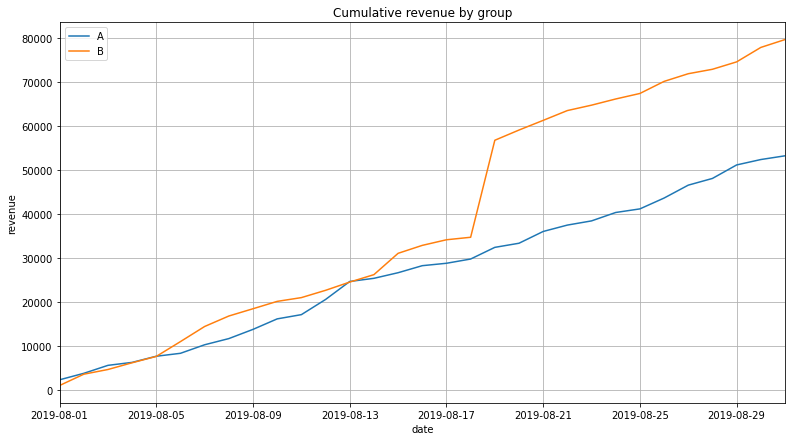

In [51]:
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')
plt.legend()
plt.margins(x=0)
plt.title('Cumulative revenue by group')
plt.xlabel('date')
plt.ylabel('revenue')
plt.grid()
plt.show();

Revenue is rising steadily.  
Both groups have spikes, with group B being more apparent.  
This might hint at either a surge in the number of orders, or a few but very expensive purchases.  
Group B is doing better.

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
That's a great assumption.</div>   

### Group cumulative avg. order size
***
[up](#Analysis)

Graph cumulative average order size by group.  
Make conclusions and conjectures.

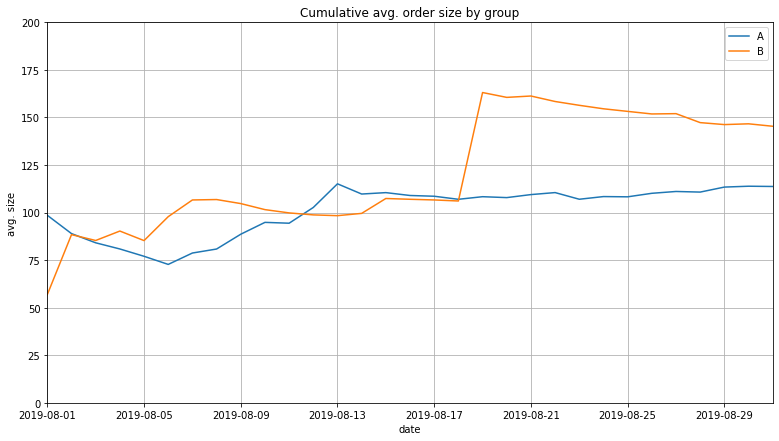

In [52]:
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'] / cumulative_revenue_A['orders'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'] / cumulative_revenue_B['orders'], label='B')
plt.legend()
plt.margins(x=0)
plt.title('Cumulative avg. order size by group')
plt.xlabel('date')
plt.ylabel('avg. size')
plt.axis([dates_groups['date'].min(), dates_groups['date'].max(), 0, 200])
plt.grid()
plt.show();

Group A becomes steady towards the end of the test.  
There can be seen 2 large spikes for group B, might be due to a few expensive purchases.  
After that it seems as if the graph stabilized, with Group A having a slow increase, and Group B having a slow decrease.

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
Quite correct observations. The appearance of the graph of group B after 19.08 is the so-called "return to the average". It is very typical for one-time powerful emissions.</div>       

### Group cumulative avg. order size - relative difference
***
[up](#Analysis)

Graph the relative difference in cumulative average order size for group B compared with group A.  
Make conclusions and conjectures.

In [53]:
merged_cumulative_revenue = cumulative_revenue_A.merge(
    cumulative_revenue_B, on='date', how='left', suffixes=['A', 'B'])
merged_cumulative_revenue.sample()

,date,revenueA,ordersA,revenueB,ordersB
20,2019-08-21,36004.2,329,61274.4,380


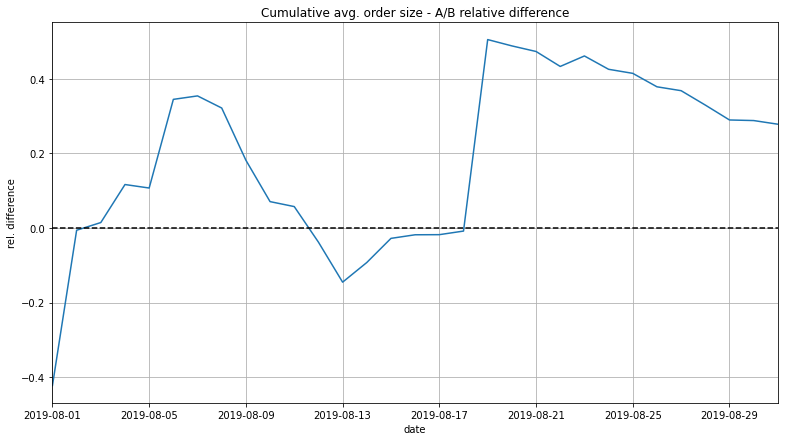

In [54]:
x = merged_cumulative_revenue['date']
y = ((merged_cumulative_revenue['revenueB'] / merged_cumulative_revenue['ordersB'])
    / (merged_cumulative_revenue['revenueA'] / merged_cumulative_revenue['ordersA'])) - 1
plt.plot(x, y)
plt.axhline(y=0, color='black', linestyle='--')
plt.margins(x=0)
plt.title('Cumulative avg. order size - A/B relative difference')
plt.xlabel('date')
plt.ylabel('rel. difference')
plt.grid()
plt.show();

The difference first oscillates between positive and negative, and after a spike it becomes positive again and gradually decreases.  
The spike is indicative of a possible outlier (big purchase).

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
  Yes, totally agree with you 👍 </div>    

### Group cumulative conversion ratio
***
[up](#Analysis)

Calculate each group's conversion rate as the ratio of orders to the number of visits for each day.  
Plot the daily conversion rates of the two groups and describe the difference.  
Draw conclusions and make conjectures.

In [55]:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visits']
cumulative_data_A = select_group(cumulative_data, 'A')
cumulative_data_B = select_group(cumulative_data, 'B')

In [56]:
dates_groups['date'].min()

Timestamp('2019-08-01 00:00:00')

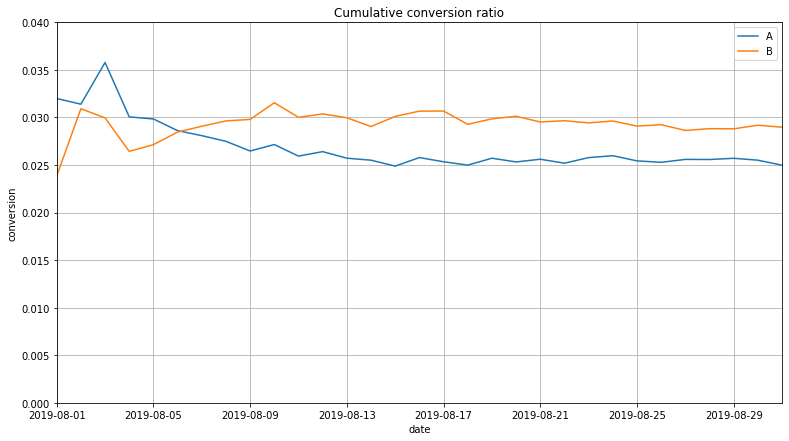

In [57]:
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')
plt.legend()
plt.title('Cumulative conversion ratio')
plt.xlabel('date')
plt.ylabel('conversion')
plt.axis([dates_groups['date'].min(), dates_groups['date'].max(), 0, 0.04])
plt.grid()
plt.show();

Both groups show a spike in the beginning, then a fall and then they stabilize.  
Group B is clearly doing better.

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
The chart above is a very good illustration of not jumping to conclusions before the cumulative metrics have "stabilized". If the business gave us only 6-7 days to do this research, the result would be highly questionable. In such a case, it would be necessary to argue to the customer that the test should be continued. After 18.08 the metrics relatively stabilized.</div>

### Orders per user
***
[up](#Analysis)

Plot a scatter chart of the number of orders per user.  
Make conclusions and conjectures.

In [58]:
orders.sample()

,transactionId,visitorId,date,revenue,group
887,383287370,407706407,2019-08-05,30.6,B


In [59]:
orders_by_users = (orders[['transactionId', 'visitorId']]
                   .groupby('visitorId', as_index=False)
                   .agg({'transactionId': 'nunique'}))
orders_by_users.columns = ['user_id', 'orders']
orders_by_users.sort_values(by='orders', ascending=False).head(3)

,user_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3


In [60]:
count_ratio(orders_by_users, 'orders')

,count,ratio
orders,,
1,937,0.96
2,29,0.03
3,7,0.01


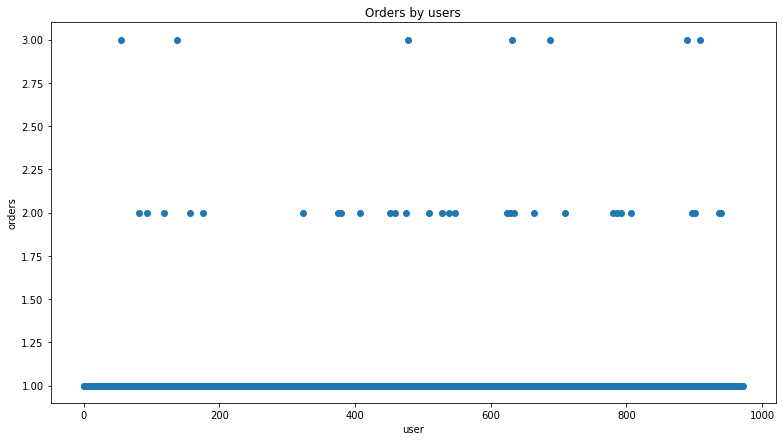

In [61]:
plt.scatter(range(len(orders_by_users)), orders_by_users['orders'])
plt.title('Orders by users')
plt.xlabel('user')
plt.ylabel('orders')
plt.show();

Most users (96%) placed a single order,  
a small share (3%) placed 2 orders,  
and just a few (1%) placed 3 orders.

### Orders per user - percentiles
***
[up](#Analysis)

Calculate the 95th and 99th percentiles for the number of orders per user.  
Define the point at which a data point becomes an anomaly.

In [62]:
display(np.percentile(orders_by_users['orders'], [90, 95, 99]))

array([1., 1., 2.])

Not more than 1% of the users placed 2 or more orders.  
Setting the threshold at 5% - 1 order,
users with 2 or 3 orders can be considered outliers.

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
Great, the outliers are detected. Thank you for the in-depth analysis.</div>       

### Orders prices
***
[up](#Analysis)

Plot a scatter chart of order prices.  
Make conclusions and conjectures.

In [63]:
# leaving this in place as documentation

# plt.scatter(range(len(orders)), orders['revenue'])
# plt.margins(x=0)
# plt.title('Orders prices')
# plt.xlabel('order')
# plt.ylabel('price')
# plt.show();

# plt.scatter(range(len(orders)), orders['revenue'])
# plt.ylim((0, 1500))
# plt.margins(x=0)
# plt.title('Orders prices')
# plt.xlabel('order')
# plt.ylabel('price')
# plt.show();

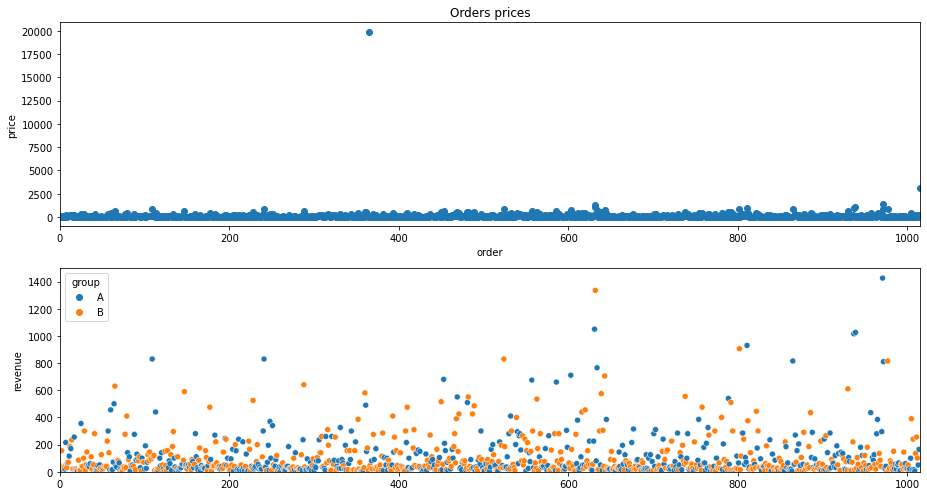

In [64]:
plt.subplot(211)
plt.scatter(range(len(orders)), orders['revenue'])
plt.margins(x=0)
plt.title('Orders prices')
plt.xlabel('order')
plt.ylabel('price')

plt.subplot(212)
sns.scatterplot(x=range(len(orders)), y=orders['revenue'], data=orders, hue='group', hue_order=['A', 'B'])
plt.ylim((0, 1500))
plt.margins(x=0)
# plt.title('Orders prices')
# plt.xlabel('order')
# plt.ylabel('price')

plt.tight_layout()
plt.show();

There is an obvious outlier (very expensive order priced at ~20,000).  
There are several orders above the average price, while most of the orders are below 500.  
The amount from each group looks equally distributed.

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
I like that after plotting the outliers, you also plotted the graph with the y-axis limit. This way we can visually see better where most of the values are concentrated.</div>       

<div style="border:solid orange 2px; padding: 20px"> <b>Remarks :</b><br>
    Please, visit this link:
        
  https://www.kaggle.com/asimislam/tutorial-python-subplots
            
 There are some information on how to make graphs using subplots :)

If you use the seaborn library to build a scatterplot, you can do a different color breakdown of groups A and B for clarity using the `hue` parameter.

This link can be useful:
 
 https://indianaiproduction.com/seaborn-scatter-plot/
</div>  

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Student comment v.1:</b> <br />
    I have actually used both techniques extensively in previous projects, but have grown accustomed to work hard with matplotlib. <br />
    I like the resulting plot with Seaborn better, and I should utilize it more. <br />
    Thanks for reminding me 😊
</div>

<div style="border:solid green 2px; padding: 20px"> <b>Success V2:</b><br>
    Wow, now it looks really great! 😍</div>     

### Orders prices - percentiles
***
[up](#Analysis)

Calculate the 95th and 99th percentiles of order prices.  
Define the point at which a data point becomes an anomaly.

In [65]:
display(np.percentile(orders['revenue'], [90, 95, 99]))

array([280.8  , 414.275, 830.3  ])

Not more than 10% of the orders are priced above 280,  
not more than 5% of the orders are priced above 415,  
and not more than 1% of the orders are priced above 831.  
Setting the threshold at ~5% - 400.

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
   Perfect! 👍 </div>   

### Group conversion - raw data statistical significance
***
[up](#Analysis)

Find the statistical significance of the difference in conversion between the groups using the raw data.  
Make conclusions and conjectures.

In [66]:
orders_by_users_A = (select_group(orders, 'A')
                     .groupby('visitorId', as_index=False)
                     .agg({'transactionId': 'nunique'}))
orders_by_users_A.columns = ['user_id', 'orders']

orders_by_users_B = (select_group(orders, 'B')
                     .groupby('visitorId', as_index=False)
                     .agg({'transactionId': 'nunique'}))
orders_by_users_B.columns = ['user_id', 'orders']

In [67]:
sample_A = pd.concat([
    orders_by_users_A['orders'],
    pd.Series(0, range(select_group(visits, 'A')['visits'].sum() - len(orders_by_users_A)))
], axis=0).rename('orders')

sample_B = pd.concat([
    orders_by_users_B['orders'],
    pd.Series(0, range(select_group(visits, 'B')['visits'].sum() - len(orders_by_users_B)))
], axis=0).rename('orders')

(len(sample_A), len(sample_B))

(18736, 18916)

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
    Well done, the samples are formed correctly 😊 </div>   

Testing whether Group A conversion rates and Group B conversion rates are similar. <br /><br />
<center>null hypothesis: Group A conversion rates and Group B conversion rates are equal.  <br />
alternative hypothesis: Group A conversion rates and Group B conversion rates differ.</center>

$$H_0: F_{X_A}(x) = F_{X_B}(x)$$
$$H_A: F_{X_A}(x) \neq F_{X_B}(x)$$
$$\text{Significance level } \alpha = 0.05$$

<s><div style="border:solid red 2px; padding: 20px"> <b>Needs fixing:</b><br>
   It's great that you used a mathematical approach to formulating hypotheses. But can you please formulate the null hypothesis and the alternative hypothesis in words in all tests?</div>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Student comment v.1:</b> <br />
    Was so busy with the math formulation, that I forgot to verbalize the hypotheses 🤭<br />
    Updated all relevant cells.
</div>

<div style="border:solid orange 2px; padding: 20px"> <b>Remarks:</b><br>
    Please, pay attention, that "equal" conception is not appliable in case of distributions. You can formulate hypotheses like this to sound more "professional":

H0: Group A conversion rates and Group B conversion rates belong to the same statistical population

H1: Group A conversion rates and Group B conversion rates don't belong to the same statistical population</div> 

In [68]:
alpha = .05
pvalue = stats.mannwhitneyu(sample_A, sample_B, alternative='two-sided')[1]
display(
    Markdown(f'p-value: {pvalue:.4f}  \nis p-value < alpha ? $~~${pvalue < alpha}'),
    Markdown(f'Group B relative gain: {sample_B.mean() / sample_A.mean() - 1:.0%}'))

p-value: 0.0110  
is p-value < alpha ? $~~$True

Group B relative gain: 16%

<s><div style="border:solid orange 2px; padding: 20px"> <b>Remarks:</b><br>

In this case, it's better to run a two-sided test using the `alternative = 'two-sided'` parameter, since it is important for us as researchers to check the results "both ways". 

I leave a link to the documentation, it will be useful (This is the new version of the library. This parameter is set by default there): 

 https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
    
But the Yandex.Practicum platform has an old version of the library - 1.4.1. 

It defaults to None (None: computes p-value half the size of the 'two-sided' p-value and a different U statistic. The default behavior is not the same as using 'less' or 'greater'; it only exists for backward compatibility and is deprecated.) Therefore, in order to get correct results, it is better to control this parameter by writing `alternative = 'two-sided'` manually.

Old version of library:

https://docs.scipy.org/doc/scipy-1.4.1/reference/generated/scipy.stats.mannwhitneyu.html
 
</div>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Student comment v.1:</b> <br />
    This I find very much important, as it could potentially lead to a wrong conclusion. <br />
    Updated all relevant cells. Thanks.
</div>

<div style="border:solid green 2px; padding: 20px"> <b>Success V2:</b><br>
    👍</div>     

In [69]:
#Reviewer's code
import scipy
scipy.__version__

'1.4.1'

p-value is within the threshold of statistical significance, we reject the null hypothesis.  
Conversion rates are statistically different,  
and group B's relative gain is 16%.

### Group avg. order size - raw data statistical significance
***
[up](#Analysis)

Find the statistical significance of the difference in average order size between the groups using the raw data.  
Make conclusions and conjectures.

Testing whether Group A average order size and Group B average order size are similar. <br /><br />
<center>null hypothesis: Group A avg. order size and Group B avg. order size are equal.  <br />
alternative hypothesis: Group A avg. order size and Group B avg. order size differ.</center>

$$H_0: F_{X_A}(x) = F_{X_B}(x)$$
$$H_A: F_{X_A}(x) \neq F_{X_B}(x)$$
$$\text{Significance level } \alpha = 0.05$$

In [70]:
sample_A = select_group(orders, 'A')['revenue']
sample_B = select_group(orders, 'B')['revenue']

In [71]:
alpha = .05
pvalue = stats.mannwhitneyu(sample_A, sample_B, alternative='two-sided')[1]
display(
    Markdown(f'p-value: {pvalue:.4f}  \nis p-value < alpha ? $~~${pvalue < alpha}'),
    Markdown(f'Group B relative gain: {sample_B.mean() / sample_A.mean() - 1:.0%}'))

p-value: 0.8622  
is p-value < alpha ? $~~$False

Group B relative gain: 28%

p-value is not within the threshold of statistical significance, we can't reject the null hypothesis.  
Average order size is statistically similar between the groups,  
while group B's relative gain is at 28%.

<s><div style="border:solid orange 2px; padding: 20px"> <b>Remarks:</b><br>

 And there is a small error in the calculations, p_value is not exactly the same, again everything is tied to the parameter `alternative='two-sided'`</div>

### Group conversion - filtered data statistical significance
***
[up](#Analysis)

Find the statistical significance of the difference in conversion between the groups using the filtered data.  
Make conclusions and conjectures.

In [72]:
users_with_many_orders = orders_by_users.query('orders >= 2')['user_id']
users_with_expensive_orders = orders.query('revenue > 400')['visitorId']

outliers_user_ids = pd.concat(
    [users_with_many_orders, users_with_expensive_orders], axis=0).drop_duplicates()

display(
    outliers_user_ids.head(),
    outliers_user_ids.shape)

55     249864742
82     366673373
94     406208401
118    522292794
138    611059232
dtype: int64

(91,)

In [73]:
orders_A_filtered = orders_by_users_A.query('user_id not in @outliers_user_ids')
sample_A_filtered = pd.concat([
    orders_A_filtered['orders'],
    pd.Series(0, range(select_group(visits, 'A')['visits'].sum() - len(orders_by_users_A)))
], axis=0).rename('orders')

orders_B_filtered = orders_by_users_A.query('user_id not in @outliers_user_ids')
sample_B_filtered = pd.concat([
    orders_B_filtered['orders'],
    pd.Series(0, range(select_group(visits, 'B')['visits'].sum() - len(orders_by_users_B)))
], axis=0).rename('orders')

(len(sample_A_filtered), len(sample_B_filtered))

(18696, 18793)

Testing whether filtered Group A conversion rates and filtered Group B conversion rates are similar. <br /><br />
<center>null hypothesis: Group A conversion rates and Group B conversion rates are equal.  <br />
alternative hypothesis: Group A conversion rates and Group B conversion rates differ.</center>

$$H_0: F_{X_A}(x) = F_{X_B}(x)$$
$$H_A: F_{X_A}(x) \neq F_{X_B}(x)$$
$$\text{Significance level } \alpha = 0.05$$

In [74]:
alpha = .05
pvalue = stats.mannwhitneyu(sample_A_filtered, sample_B_filtered, alternative='two-sided')[1]
display(
    Markdown(f'p-value: {pvalue:.4f}  \nis p-value < alpha ? $~~${pvalue < alpha}'),
    Markdown(f'Group B relative gain: {sample_B_filtered.mean() / sample_A_filtered.mean() - 1:.0%}'))

p-value: 0.9407  
is p-value < alpha ? $~~$False

Group B relative gain: -1%

p-value is not within the threshold of statistical significance, we can't reject the null hypothesis.  
The conversion rates for both groups are similar.  

This is in stark contrast to the results we got with unfiltered raw data, where we concluded that the groups have different conversion rates.

### Group avg. order size - filtered data statistical significance
***
[up](#Analysis)

In [75]:
sample_A = orders.query('group == "A" and visitorId not in @outliers_user_ids')['revenue']
sample_B = orders.query('group == "B" and visitorId not in @outliers_user_ids')['revenue']

Testing whether filtered Group A average order size and filtered Group B average order size are similar. <br /><br />
<center>null hypothesis: Group A avg. order size and Group B avg. order size are equal.  <br />
alternative hypothesis: Group A avg. order size and Group B avg. order size differ.</center>

$$H_0: F_{X_A}(x) = F_{X_B}(x)$$
$$H_A: F_{X_A}(x) \neq F_{X_B}(x)$$
$$\text{Significance level } \alpha = 0.05$$

In [76]:
alpha = .05
pvalue = stats.mannwhitneyu(sample_A, sample_B, alternative='two-sided')[1]
display(
    Markdown(f'p-value: {pvalue:.4f}  \nis p-value < alpha ? $~~${pvalue < alpha}'),
    Markdown(f'Group B relative gain: {sample_B.mean() / sample_A.mean() - 1:.0%}'))

p-value: 0.6566  
is p-value < alpha ? $~~$False

Group B relative gain: -6%

p-value is not within the threshold of statistical significance, we can't reject the null hypothesis.  
Average order size is statistically similar between the groups.

Group B has a 6% loss compared to Group A. 

<s><div style="border:solid orange 2px; padding: 20px"> <b>Remarks:</b><br>
The filtered data calculation is also correct, except for `p_value`, see comments above.</div>

### Test continuation
***
[up](#Analysis)

Based on the results of filtered data's hypothesis testing,  
Group A and Group B have similar conversion ratios and avg. purchase size.  
Despite that, Group B falls short of Group A (1% loss on conversion, 6% loss on avg. purchase size).

The graphs showing cumulative values indicate that the values have mostly stabilized,  
so there is no use in continuing the tests - there is little chance for a drastic change.

Both groups performed similarly.

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
    Very well! Thanks a lot for the conclusion 👍</div> 